# Regularización y Ajuste de hyperparámetros en Machine learning

**Videos recomendados**
- Batch vs SGD: https://youtu.be/2p58rVgqsgo
- Mini-batch size: https://youtu.be/GrrO1NFxaW8 - [Interesante](https://research.fb.com/publications/accurate-large-minibatch-sgd-training-imagenet-in-1-hour/)
- Number of hidden units: https://youtu.be/IkGAIQH5wH8
- Learning rate: https://youtu.be/TwJ8aSZoh2U
- Learning rate 2: https://youtu.be/HLMjeDez7ps
- Overfitting: https://youtu.be/EeBZpb-PSac
- Overfitting 2: https://youtu.be/SVqEgaT1lXU
- Early Stopping: https://youtu.be/NnS0FJyVcDQ
- Regularization: https://youtu.be/aX_m9iyK3Ac
- Dropout: https://youtu.be/Ty6K6YiGdBs
- Dropout 2: https://youtu.be/6DcImJS8uV8
- Dropout 3: https://youtu.be/8nG8zzJMbZw
- Vanishing gradient: https://youtu.be/W_JJm_5syFw
- Other activatin functions: https://youtu.be/VzGOR5SlFSw
- Local minima: https://youtu.be/gF_sW_nY-xw
- Random restart: https://youtu.be/idyBBCzXiqg
- Momentum: https://youtu.be/r-rYz_PEWC8

Muy recomendado:  
[Practical Recommendations for Gradient-Based Training of Deep
Architectures - Yoshua Bengio - 2012](https://arxiv.org/pdf/1206.5533.pdf)

** Hacer una tabla con todos los parametros e hyperparametros en el pizarron a medida que van apareciendo **

Parametros  
- Pesos de interconexión entre neuronas (w)
- Bias de neuronas (b)

Hyperparametros  
- Cantidad de capas
- Cantidad de unidades por capas
- Funciones de activación
- Learning rates
- Optimizadores
- Batch-size
- Inicialización
- Momentum
- Probabilidad de dropout

In [5]:
%load_ext autoreload
%autoreload 2
from IPython.display import HTML
import reg_helper as RHelper

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Overfitting en clasificación
<img src="images/classif_overfitting.png" alt="Drawing" style="width:60%;"/>

## Overfitting en regresión lineal
<img src="images/regress_overfitting.png" alt="Drawing" style="width:70%; "/>

## ¿Como se mide la performance de un algoritmo de aprendizaje?
- Loss function o Objective function
- Separación de train, test, cross-validation

### Regresion lineal - Función objetivo
(Media de error cuadratico)  

$J(\theta) = \frac{1}{2m}\sum{_{i=1}^m[h_\theta(x^{(i)})-y^{(i)}]^2}$

$L = \sum{_{i=1}^n[f(x_i; w)-y_i]^2}$

$L = ||\hat{y}-y_i||^2$

### Regresion logistica (Clasificacion) - Función objetivo:
(Cross-entropy)

$J(\theta) = -\frac{1}{m}[\sum{_{i=1}^my^{(i)}logh_\theta(x^{(i)}) + (1-y^{(i)})log(1-h_\theta(x^{(i)}))}]$

### Redes neuronales (Para clasificación):
$J(\theta) = -\frac{1}{m}[\sum{_{i=1}^m\sum{_{k=1}^K}y_k^{(i)}logh_\theta(x^{(i)})_k + (1-y_k^{(i)})log(1-h_\theta(x^{(i)})_k)}]$


**¿Cual es la $h_\theta(x^{(i)})$ en cada caso?**

$h_\theta(x^{(i)})_{lin} = \theta_0 + x_1^{(i)} \theta_1 + x_2^{(i)} \theta_2 + ... + x_n^{(i)} \theta_n$

$h_\theta(x^{(i)})_{log} = \sigma (h_\theta(x^{(i)})_{lin})$

** Notacion:**
- $J(\theta)$ ó $L$: Loss function, objective function, cost function
- $x^{(i)}$: Mediciones, variables independientes, features, covariates. Es un vector de dimensión $d$, cada $i$ indica una medición diferente
- $y^{(i)}$: Salida, etiqueta, label, target. La salida $i$-esima corresponde a la entrada $i$-esima
- $m$ ó $n$: Cantidad de mediciones
- $\theta$ ó $w$: Parametros a estimar. Son un total de $d+1$
- $h_{\theta}(x^{(i)})$ ó $f(x_i;w)$: Salida de mi estimador
- $K$: Cantidad de salidas de la red neuronal

## Nuestra meta
- Minimizar $J_{test}$ -> Generalizar
- Lo "mas rapido posible" sin aumentar el error

---
## Soluciones al overfitting
- Ajuste de la cantidad de parametros
- Early stop
- Inicialización de pesos
- Regularización L0, L1, L2
- Dropout (Solo para redes neuronales) [link](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/)
- Batch Normalization
- Aumentar el tamaño del dataset: Buscar más datos o generarlo en forma artificial (Data augmentation)

---
### 0 Ilustraremos el problema con un ejemplo

Librerias a utilizar:  
[sklearn](http://scikit-learn.org/stable/index.html)  
[keras:](https://keras.io/)
- API de alto nivel (high-level neural networks API)
- Escrita en Python 
- **Backend**: Corre sobre TensorFlow, CNTK, o Theano

#### 0.1 Importamos el dataset

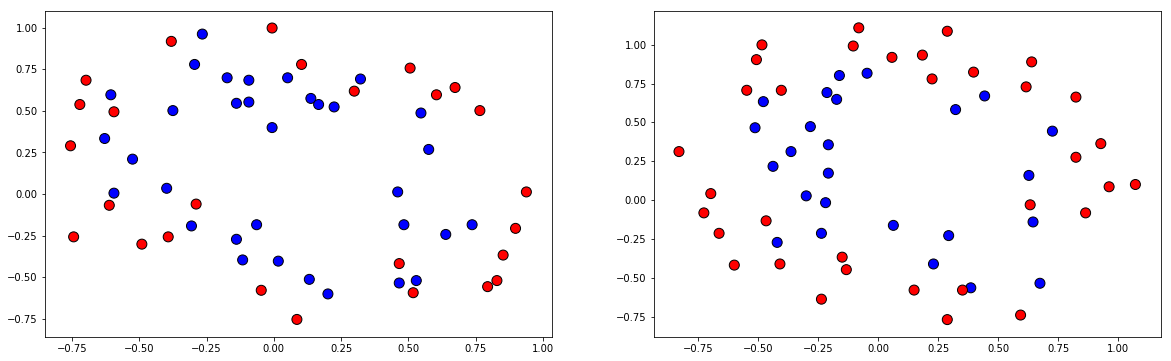

In [7]:
import numpy as np
import draw_nn
from matplotlib import pyplot as plt 
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy') 
y_test = np.load('y_test.npy')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, ax=ax2)
plt.show()

#### 0.2 ¿Por que este dataset?
- Pocas muestras. Soluciones rápidas
- Simple para graficar en 2D. Se puede ver el resultado en el plano
- Naturalmente con un par de decenas de parametros se debería presentar overfitting

---
### 1. Ajuste de la cantidad de parametros

#### 1.1 Regresión Logística polinomial
(Overfitting - High Variance)  
Aumenta la cantidad de parámetros debido al aumento de la cantidad de entradas

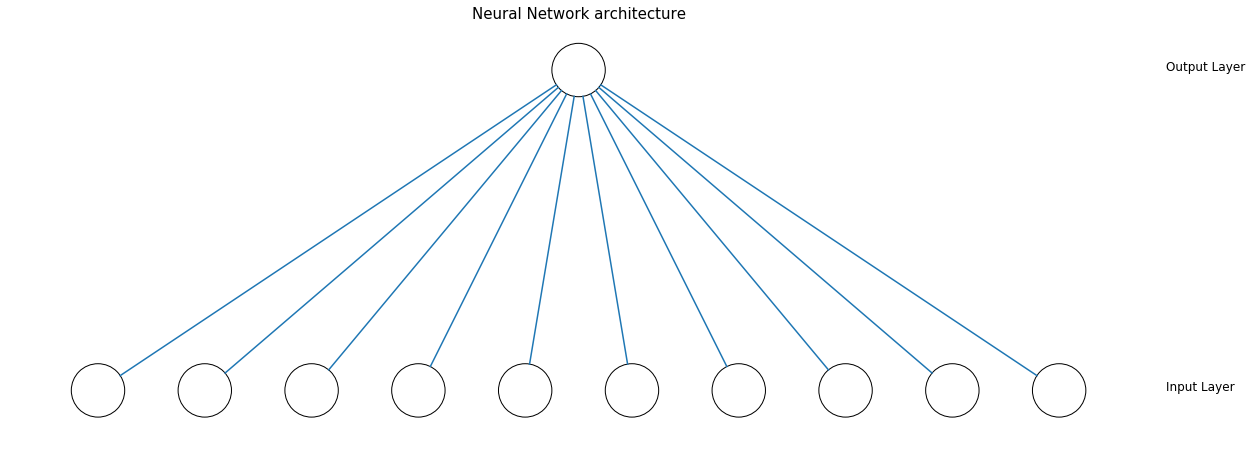

In [8]:
network = draw_nn.DrawNN( [10, 1] )
network.draw()

** Ejemplo de regresión polinomial de orden 18, 6 y 2 **

/Users/julianganzabal/anaconda3/envs/mllab/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Regresion Logistica Polinomial de orden 18, con lamdba (regularización L2):0


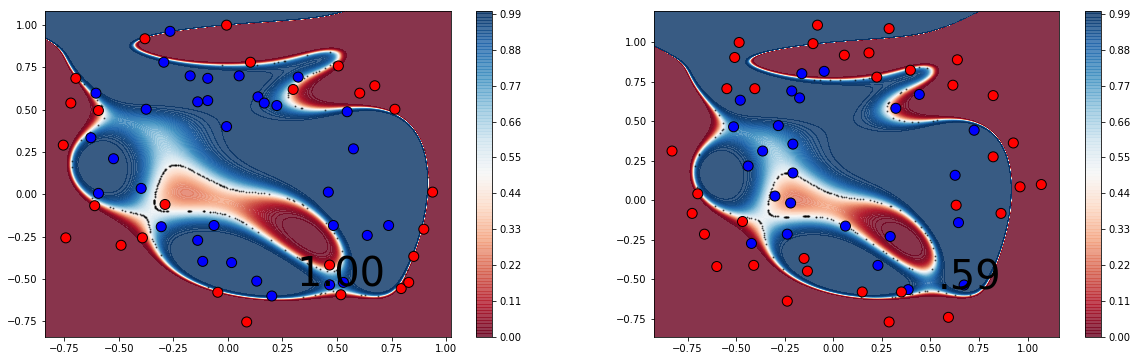

In [9]:
degree = 18
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=degree)

Aclaración: El overfitting se dá debido a la cantidad de parámetros, no debido a la cantidad de entradas

/Users/julianganzabal/anaconda3/envs/mllab/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Regresion Logistica Polinomial de orden 6, con lamdba (regularización L2):0


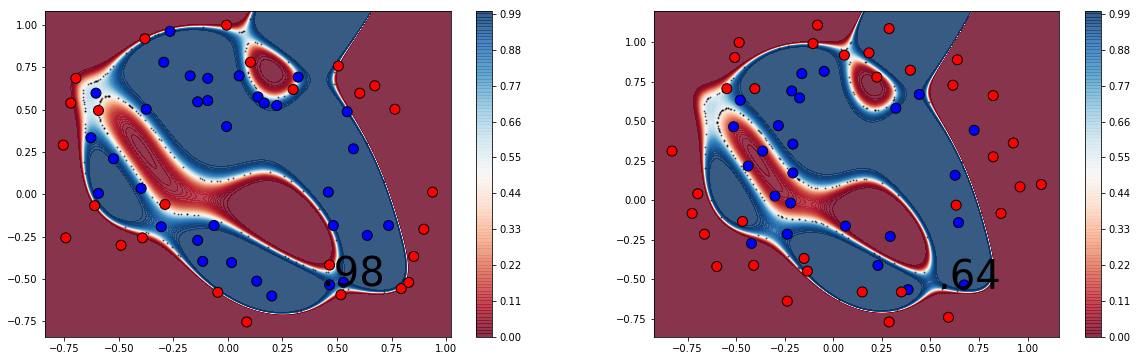

In [10]:
degree = 6
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=degree)

Regresion Logistica Polinomial de orden 2, con lamdba (regularización L2):0


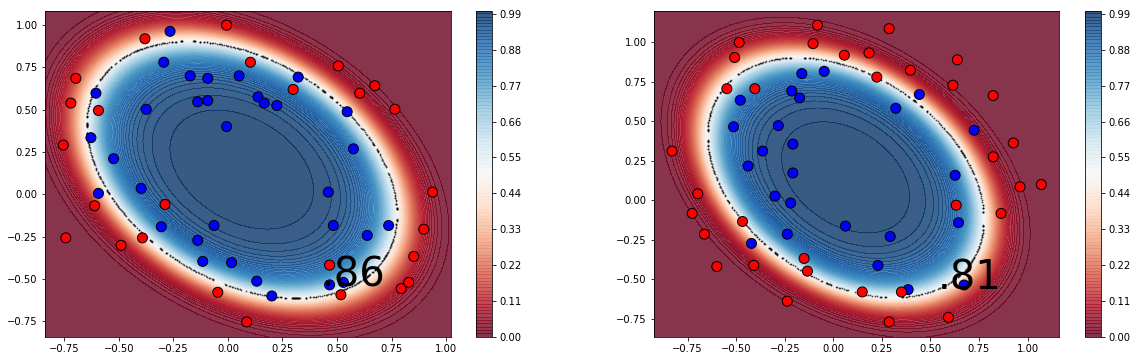

In [11]:
degree = 2
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=degree)

** Underfitting ** (Highs Bias)

Regresion Logistica Polinomial de orden 1, con lamdba (regularización L2):0


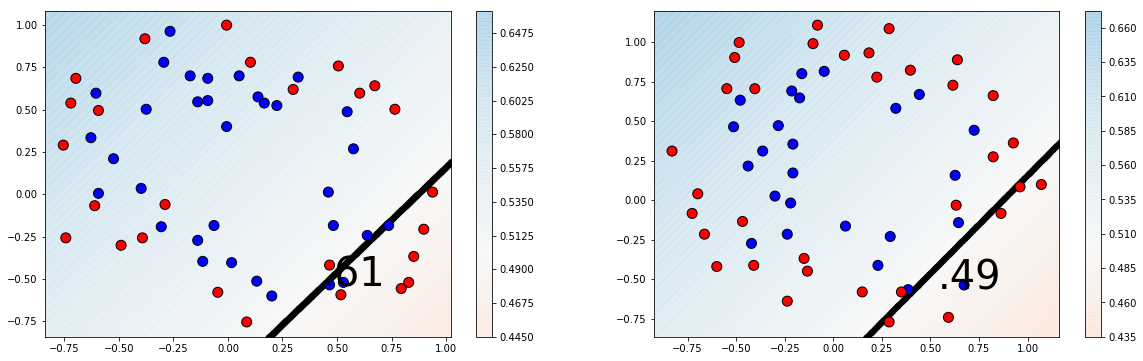

In [12]:
degree = 1
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=degree)

¿Cuál es el optimo?

In [13]:
options = [{'degree': 1, 'lambd': 0}, 
           {'degree': 2, 'lambd': 0}, 
           {'degree': 3, 'lambd': 0}, 
           {'degree': 4, 'lambd': 0}, 
           {'degree': 5, 'lambd': 0}, 
           {'degree': 6, 'lambd': 0}, 
           {'degree': 7, 'lambd': 0}, 
           {'degree': 8, 'lambd': 0}, 
           {'degree': 9, 'lambd': 0}, 
           {'degree': 10, 'lambd': 0},
           {'degree': 11, 'lambd': 0},
           {'degree': 12, 'lambd': 0},
           {'degree': 13, 'lambd': 0},
           {'degree': 14, 'lambd': 0}, 
           {'degree': 15, 'lambd': 0}, 
           {'degree': 16, 'lambd': 0}, 
           {'degree': 17, 'lambd': 0}, 
           {'degree': 18, 'lambd': 0}
           ]
degrees_0, lambdas_0, train_acc_array_0, test_acc_array_0, coefs_array_mean_0, coefs_array_std_0, coefs_abs_max_0, coefs_norm, coefs_num = RHelper.test_options(X_train, y_train, X_test, y_test, options, plot_it=False)

Cantidad de parametros en función del orden del polinomio


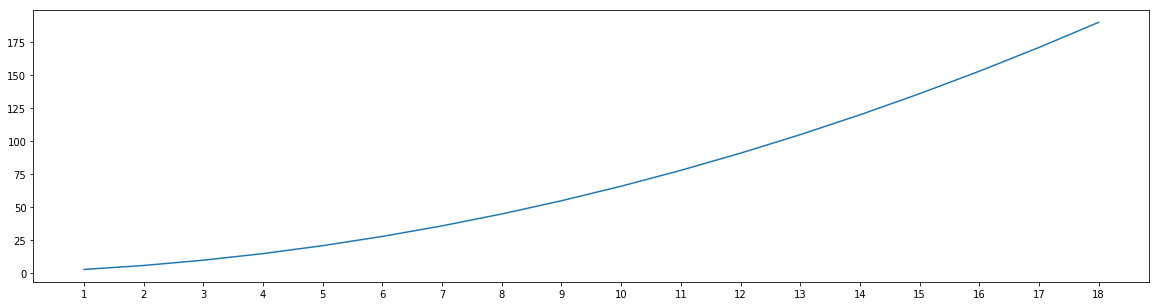

Accuracies


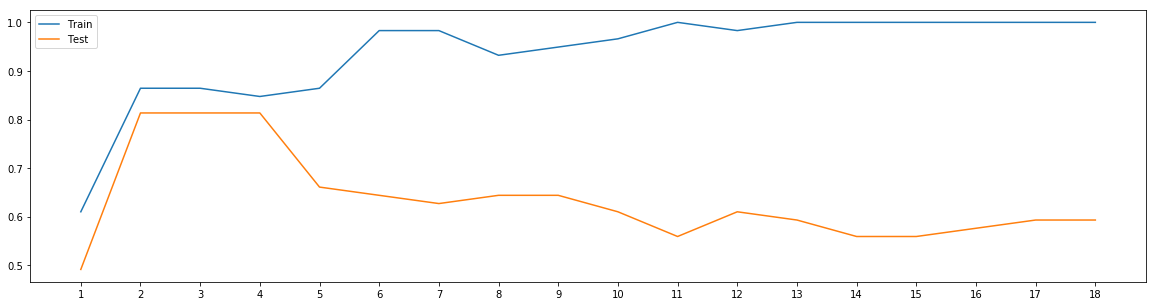

Medias de los pesos


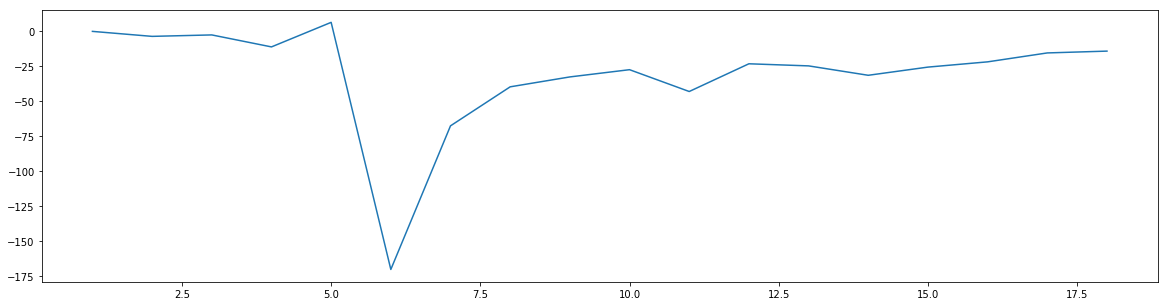

STDs de los pesos


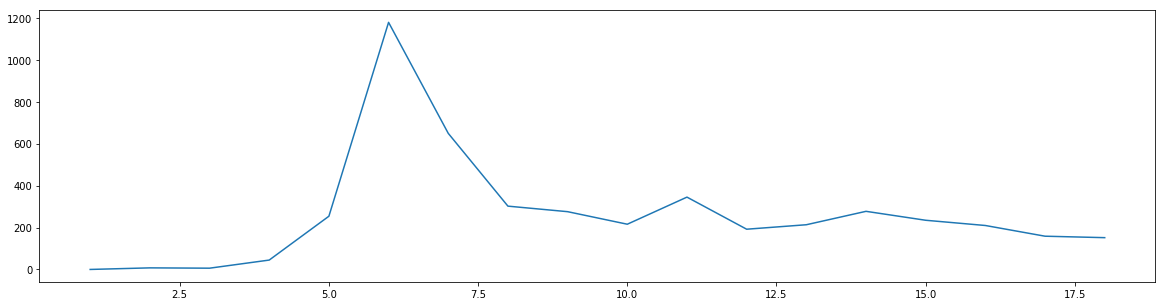

Maximo de los pesos


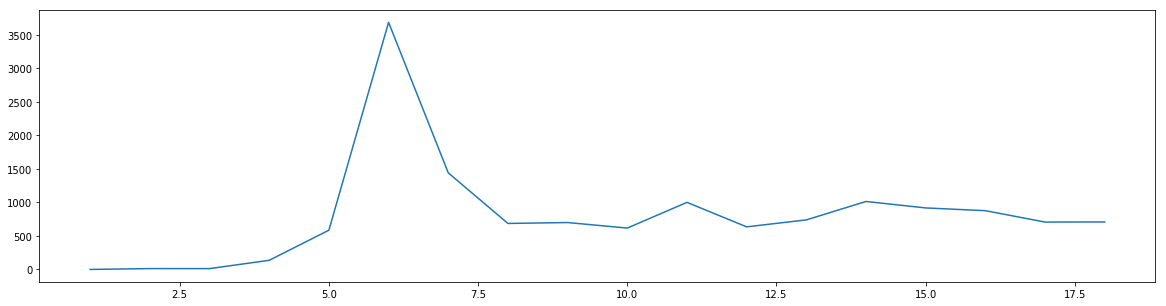

Norma de vector de pesos


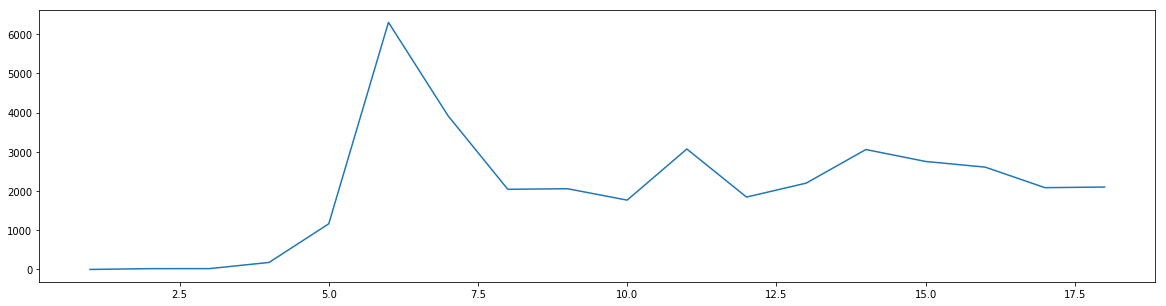

In [14]:
print("Cantidad de parametros en función del orden del polinomio")
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(degrees_0, coefs_num)
ax.legend()
ax.set_xticks(degrees_0)
plt.show()
print("Accuracies")
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(degrees_0, train_acc_array_0, label="Train")
ax.plot(degrees_0, test_acc_array_0, label="Test")
ax.set_xticks(degrees_0)
ax.legend()
plt.show()
plt.figure(figsize=(20,5))
print("Medias de los pesos")
plt.plot(degrees_0, coefs_array_mean_0)
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
print("STDs de los pesos")
plt.plot(degrees_0, coefs_array_std_0)
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
print("Maximo de los pesos")
plt.plot(degrees_0, coefs_abs_max_0)
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
print("Norma de vector de pesos")
plt.plot(degrees_0, coefs_norm)
plt.legend()
plt.show()

Preguntas:
- Cual es la cantidad de parámetros óptima?
- Que pasa con los pesos?

#### 1.2 Red Neuronal con capa oculta

Agrando cantidad de parametros pero en vez de polinomial a la entrada, agrego una capa oculta

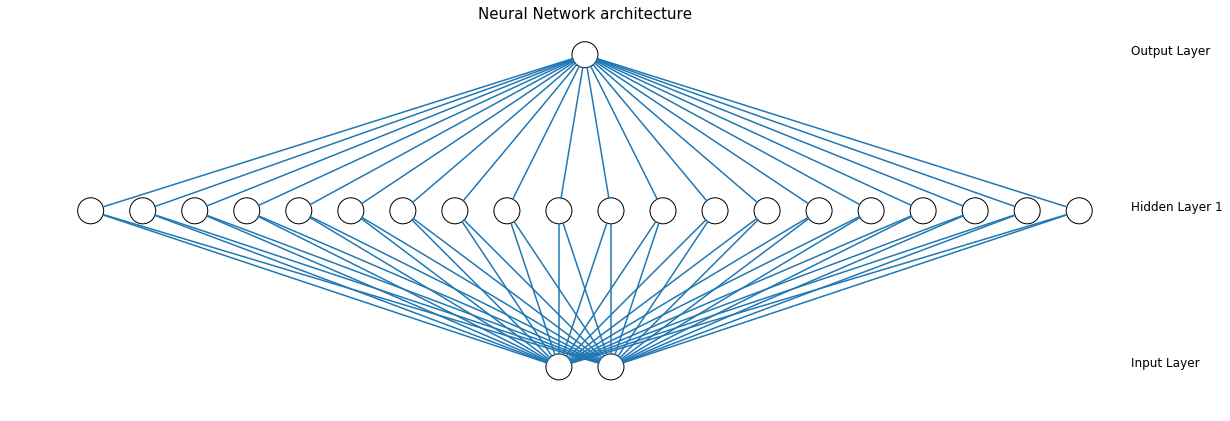

In [113]:
input_shape = 2
hidden_units = 20 # Probar con 3, 10, 20, 200
output_size = 1
network = draw_nn.DrawNN( [input_shape, hidden_units, output_size] )
network.draw()

<video controls src="./chips-mlp-20-hidden-1.mp4" width="480"/>

In [17]:
two_layer_model = RHelper.get_two_layer_model_L2(input_shape, output_size, hidden_units=hidden_units, lr=0.1, l2_lambda=0, decay=0.0)
two_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                60        
_________________________________________________________________
Salida (Dense)               (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


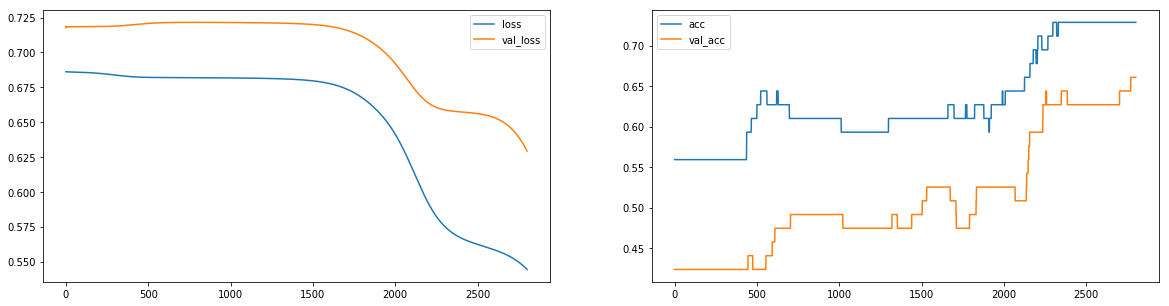

In [131]:
from fnn_helper import PlotLosses
from keras import optimizers
epochs = 3000 #adam 3000, sgd 30000
optim = optimizers.sgd(lr=1, decay=0, momentum=0) # cambiar a momentum 0.9 y lr a 5
batch_size = 59 # 10 y 59

# optim = optimizers.adam(lr=0.4, decay=0.0001)
# optim = optimizers.rmsprop(lr=0.01, decay=0.001)

plot_losses = PlotLosses(plot_interval=200, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
two_layer_model = RHelper.get_two_layer_model_L2(input_shape, 
                                                 output_size, 
                                                 hidden_units=hidden_units, 
                                                 lr=lr, 
                                                 l2_lambda=0, 
                                                 decay=decay,
                                                 optim = optim
                                                )
two_layer_model.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses],
         )

¿Que diferencias se ven entre?
- ADAM y SGD. En cuanto a tiempos, curva de entrenamiento (monotona decreciente?)
- mini-batch size?
- con el decay?

42432/43888 [============================>.] - ETA: 0s(43888, 1)


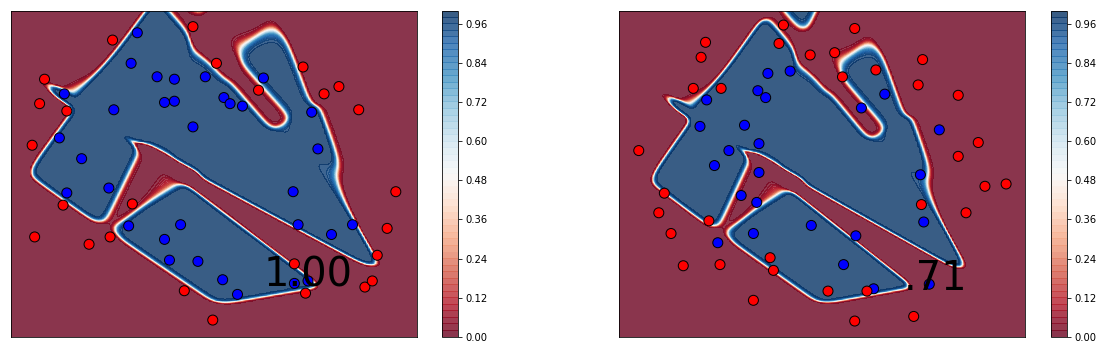

In [46]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train, y_train, two_layer_model.evaluate(X_train, y_train)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test, y_test, two_layer_model.evaluate(X_test, y_test)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax2)
plt.show()

In [47]:
def get_weights_array(ws):
    weights_norm = []
    for weights in ws:
        weights_norm.append(weights[0].std())
    return weights_norm

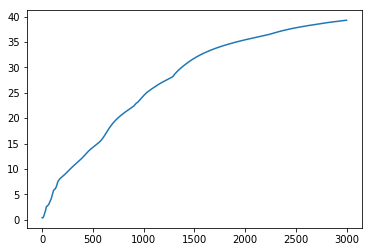

In [48]:
plt.plot(get_weights_array(plot_losses.weights))
plt.show()

Preguntas:
- Cual es la cantidad de parámetros óptima?

#### 1.3 Optimizadores
[Keras optimizers](https://keras.io/optimizers/)  
[Para profundizar](http://ruder.io/optimizing-gradient-descent/)
- Generalmente aceleran el Gradient Descent con diversas técnicas
- Primera estrategia: Agregar momentum
- Ejemplo de J con vertical mas angosto que horizontal
- RMSprop (divide el gradiente por el promedio de su valor reciente)
- Adam: Combina momentum con RMSprop

#### 1.4 High Variance vs High Bias Trade-off
Los porcentajes son error en este ejemplo. Problema hipotetico
- Train: 1%
- Dev o CV: 12%  
Como se considera?

- Train: 15%
- Dev o CV: 16%  
Como se considera?

- Train: 15%
- Dev o CV: 30%  
Como se considera? (Podria ser por regiones)

- Train: 0.5%
- Dev o CV: 1%  
Como se considera?


Como determino que es High Bias?
- Human, Optimal (bayesian)

#### 1.5 Reglas generales: 

- Mirar el Train set para ver Alto bias
- Si alto bias => Agrandar Red, Entrenar mas tiempo?
- Mirar CV, dev para ver si hay Alta Varianza
- Si alta varianza => Conseguir mas datos, Achicar red, Early stop, regularización?

Es un loop entre mirar train y CV

Ambos parecen contradictorios y en muchos casos lo son. Pero el beneficio de la regulatización hace que pueda agrandar la red para reducir el bias sin aumentar significativamente la varianza.

---
### 2. Early stop
#### 2.1 Regresión Logística polinomial

**Arrancamos con polinomio de grado 18 con regresión logistica**

In [49]:
degree = 18
# descarto la primer columna de 1s debido a que el bias lo agrega la red neuronal
X_train_degree = RHelper.get_polynimial_set(X_train, degree=degree, bias=False)
X_test_degree = RHelper.get_polynimial_set(X_test, degree=degree, bias=False)
basic_model = RHelper.get_basic_model(X_train_degree.shape[1], 1)
basic_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Salida (Dense)               (None, 1)                 190       
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________


**Importante aca el ModelCheckpoint**

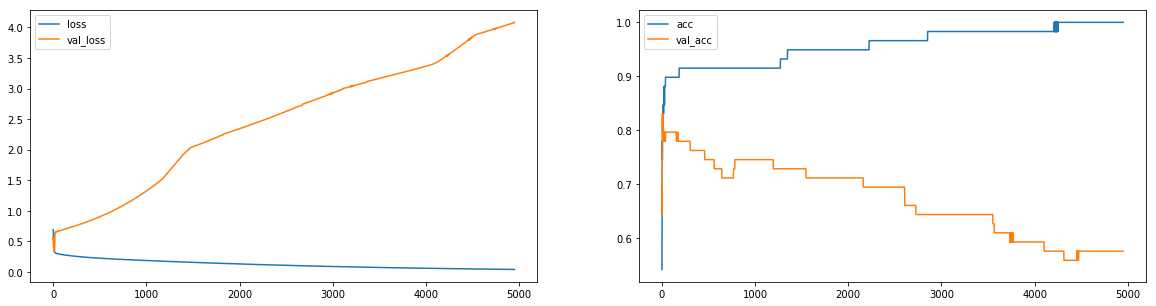

In [50]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='basic_model_best.hdf5', verbose=0, save_best_only=True)
plot_losses = PlotLosses(plot_interval=50, evaluate_interval=None, x_val=X_test_degree, y_val_categorical=y_test)
basic_model = RHelper.get_basic_model(X_train_degree.shape[1], 1, lr=0.5)
basic_model.fit(X_train_degree, 
          y_train, batch_size = 59,
          epochs=5000, 
          verbose=0, 
          validation_data=(X_test_degree, y_test), 
          callbacks=[plot_losses, checkpointer],
         )

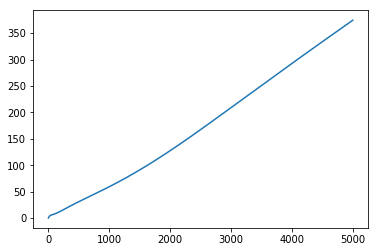

In [51]:
plt.plot(get_weights_array(plot_losses.weights))
plt.show()

** Guardamos los pesos del resultado final y graficamos**

In [52]:
basic_model.save_weights('basic_model.hdf5')

42976/43888 [============================>.] - ETA: 0s(43888, 1)


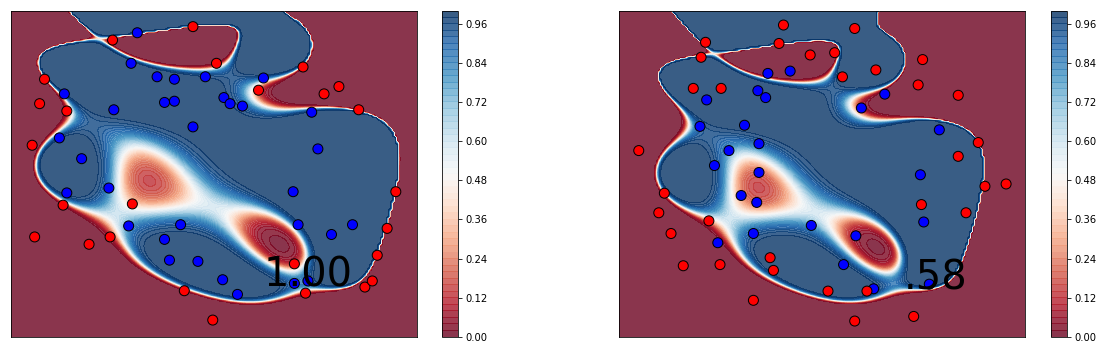

In [53]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train_degree, y_train, basic_model.evaluate(X_train_degree, y_train)[1], basic_model.predict_proba, degree=degree, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test_degree, y_test, basic_model.evaluate(X_test_degree, y_test)[1], basic_model.predict_proba, degree=degree, h = 0.01, margin=0.1, ax=ax2)
plt.show()

** Cargo los pesos del checkpoint y grafico **

42560/43888 [============================>.] - ETA: 0s(43888, 1)


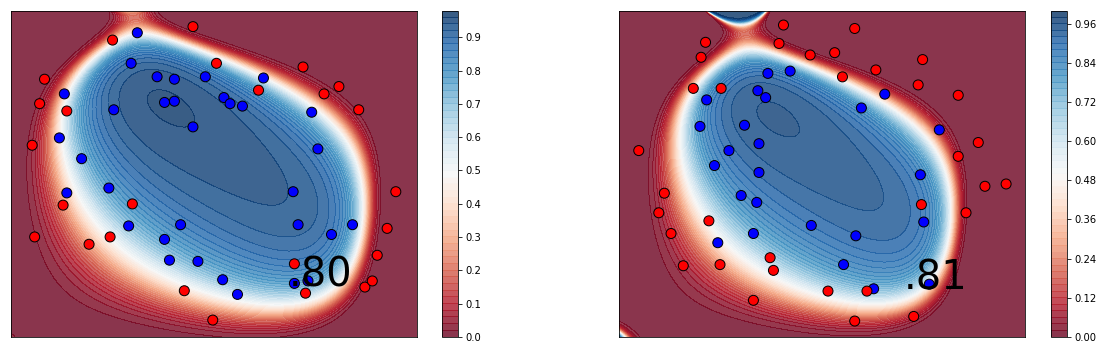

In [54]:
basic_model.load_weights('basic_model_best.hdf5')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train_degree, y_train, basic_model.evaluate(X_train_degree, y_train)[1], basic_model.predict_proba, degree=degree, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test_degree, y_test, basic_model.evaluate(X_test_degree, y_test)[1], basic_model.predict_proba, degree=degree, h = 0.01, margin=0.1, ax=ax2)
plt.show()

Se puede ver claramente como el resultado es mejor

#### 2.2 Red Neuronal con capa oculta:

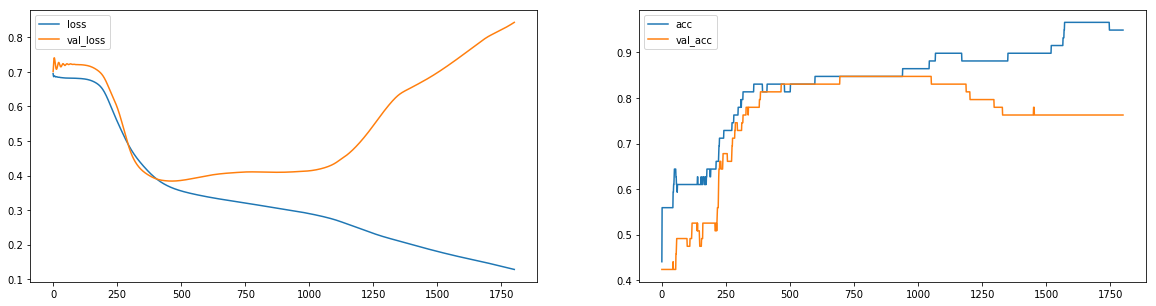

In [55]:
lr = 0.01 # hasta 0.4
decay = 0.00
plot_losses = PlotLosses(plot_interval=200, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
checkpointer = ModelCheckpoint(filepath='two_layer_model_best.hdf5', verbose=0, save_best_only=True)
two_layer_model = RHelper.get_two_layer_model_L2(input_shape, output_size, hidden_units=hidden_units, lr=lr, l2_lambda=0, decay=decay)
two_layer_model.fit(X_train, 
          y_train, batch_size = 59,
          epochs=2000, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses, checkpointer],
         )

In [56]:
two_layer_model.save_weights('two_layer_model.hdf5')

43648/43888 [============================>.] - ETA: 0s(43888, 1)


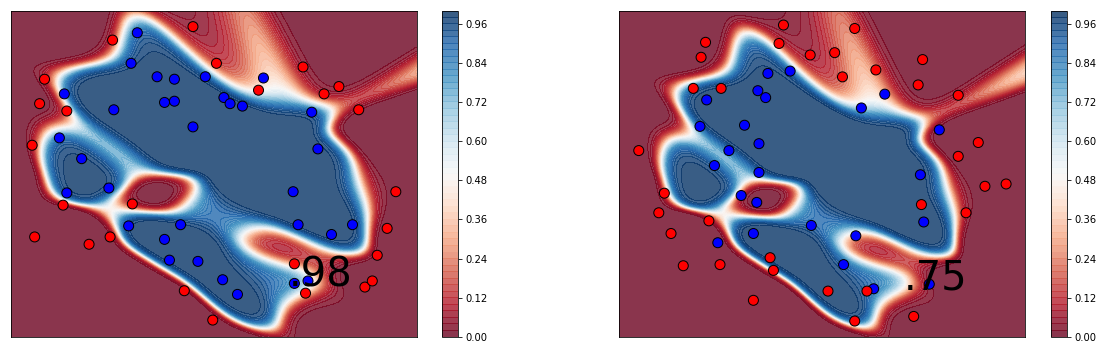

In [57]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train, y_train, two_layer_model.evaluate(X_train, y_train)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test, y_test, two_layer_model.evaluate(X_test, y_test)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax2)
plt.show()

42624/43888 [============================>.] - ETA: 0s(43888, 1)


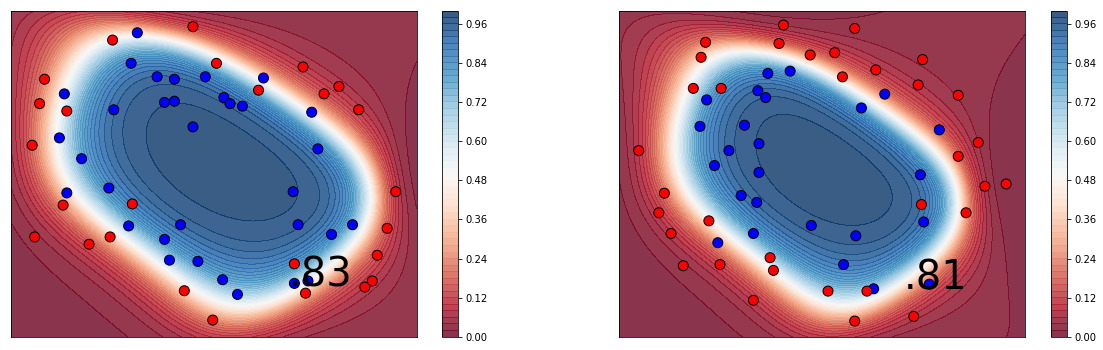

In [58]:
two_layer_model.load_weights('two_layer_model_best.hdf5')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train, y_train, two_layer_model.evaluate(X_train, y_train)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test, y_test, two_layer_model.evaluate(X_test, y_test)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax2)
plt.show()

---
### 3. Restricciones (Constraints)

In [59]:
def get_new_weights(basic_model, multiplier):
    new_weights = []
    for layer_weights in basic_model.get_weights():
        new_weights.append(layer_weights*multiplier)
    return new_weights

42592/43888 [============================>.] - ETA: 0s(43888, 1)

4.10564062151 0.0405890170043


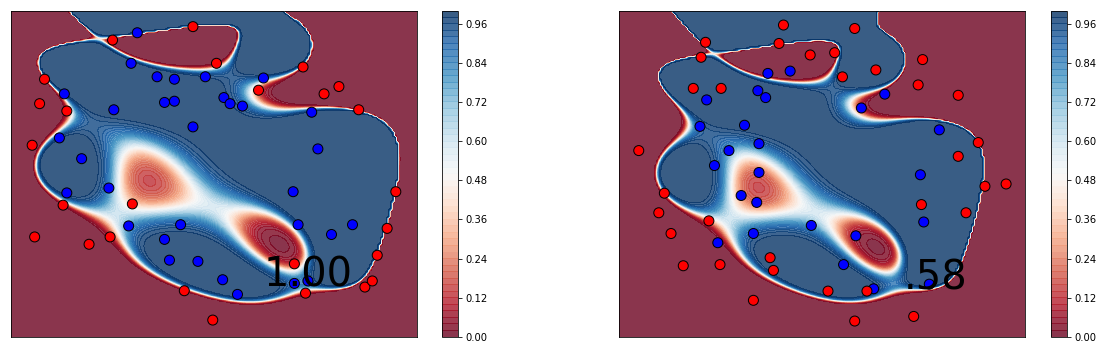

43136/43888 [============================>.] - ETA: 0s(43888, 1)

32/59 [===============>..............] - ETA: 0s2.18949094263 0.260465842687


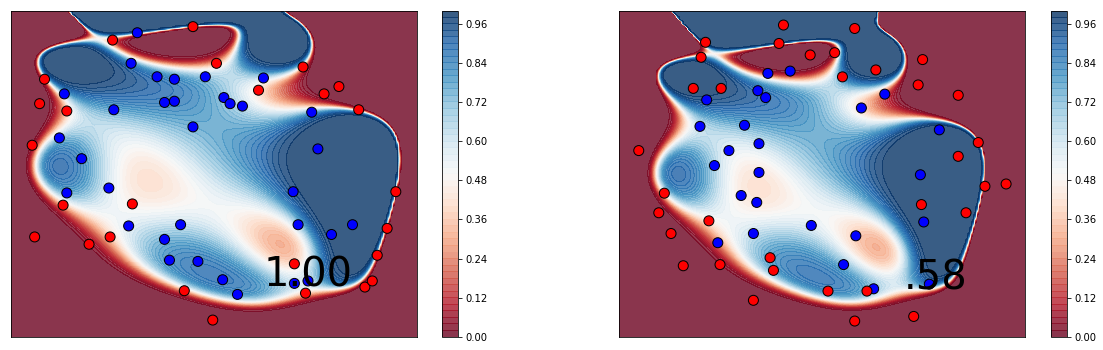

43072/43888 [============================>.] - ETA: 0s(43888, 1)

32/59 [===============>..............] - ETA: 0s6.13974421711 0.00255087813189


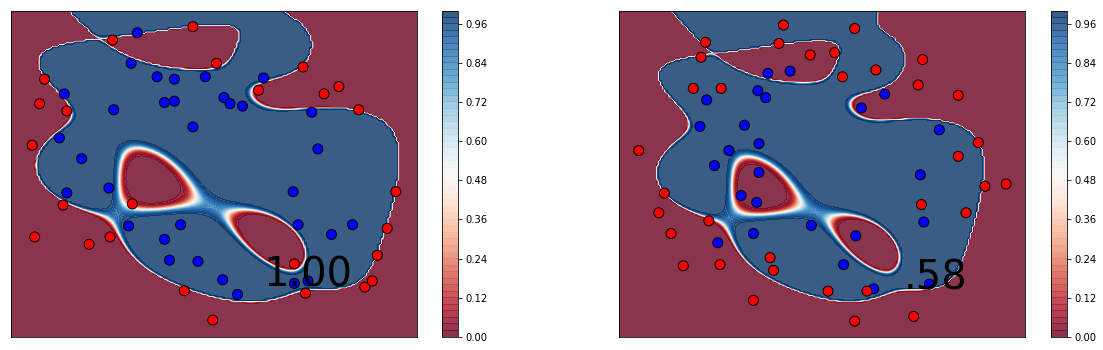

In [60]:
basic_model_0 = RHelper.get_basic_model(X_train_degree.shape[1], 1)
basic_model_1 = RHelper.get_basic_model(X_train_degree.shape[1], 1)
basic_model_2 = RHelper.get_basic_model(X_train_degree.shape[1], 1)
basic_model_0.load_weights('basic_model.hdf5')
basic_model_1.set_weights(get_new_weights(basic_model_0, 0.2))
basic_model_2.set_weights(get_new_weights(basic_model_0, 5))


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train_degree, y_train, basic_model_0.evaluate(X_train_degree, y_train, verbose=0)[1], basic_model_0.predict_proba, degree=degree, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test_degree, y_test, basic_model_0.evaluate(X_test_degree, y_test, verbose=0)[1], basic_model_0.predict_proba, degree=degree, h = 0.01, margin=0.1, ax=ax2)
print()
print(basic_model_0.evaluate(X_test_degree, y_test, verbose=0)[0], basic_model_0.evaluate(X_train_degree, y_train, verbose=0)[0])
plt.show()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train_degree, y_train, basic_model_1.evaluate(X_train_degree, y_train)[1], basic_model_1.predict_proba, degree=degree, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test_degree, y_test, basic_model_1.evaluate(X_test_degree, y_test)[1], basic_model_1.predict_proba, degree=degree, h = 0.01, margin=0.1, ax=ax2)
print()
print(basic_model_1.evaluate(X_test_degree, y_test)[0], basic_model_1.evaluate(X_train_degree, y_train)[0])
plt.show()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train_degree, y_train, basic_model_2.evaluate(X_train_degree, y_train)[1], basic_model_2.predict_proba, degree=degree, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test_degree, y_test, basic_model_2.evaluate(X_test_degree, y_test)[1], basic_model_2.predict_proba, degree=degree, h = 0.01, margin=0.1, ax=ax2)
print()
print(basic_model_2.evaluate(X_test_degree, y_test)[0], basic_model_2.evaluate(X_train_degree, y_train)[0])
plt.show()

In [61]:
from keras.constraints import max_norm
from keras import regularizers
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import optimizers
max_norm_data = 10
model_max_norm = Sequential()
optim = optimizers.adam(lr=0.4)
model_max_norm.add(Dense(output_size, input_dim=X_train_degree.shape[1],
                activation='sigmoid', 
                kernel_initializer='normal', 
                name='Salida', 
                kernel_constraint=max_norm(max_norm_data),
                bias_constraint=max_norm(max_norm_data)
               ))
model_max_norm.compile(loss = 'binary_crossentropy', optimizer=optim, metrics=['accuracy'])
model_max_norm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Salida (Dense)               (None, 1)                 190       
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________


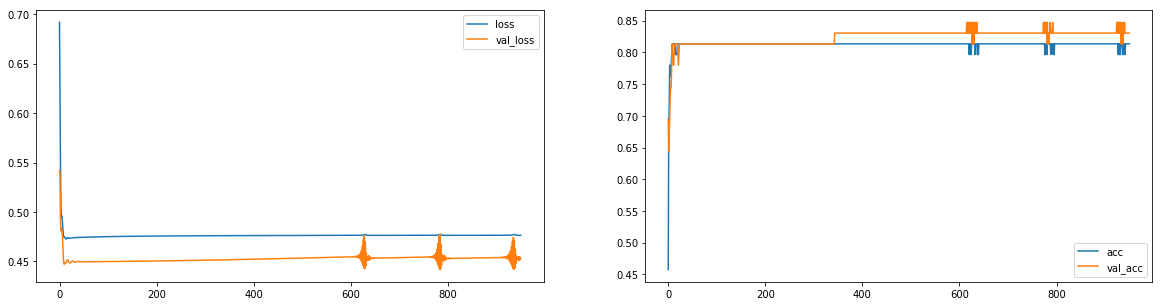

In [62]:
checkpointer = ModelCheckpoint(filepath='model_max_norm_best.hdf5', verbose=0, save_best_only=True)
plot_losses_const = PlotLosses(plot_interval=50, evaluate_interval=None, x_val=X_test_degree, y_val_categorical=y_test)
model_max_norm.fit(X_train_degree, 
          y_train, batch_size = 59,
          epochs=1000, 
          verbose=0, 
          validation_data=(X_test_degree, y_test), 
          callbacks=[plot_losses_const, checkpointer],
         )

43392/43888 [============================>.] - ETA: 0s(43888, 1)


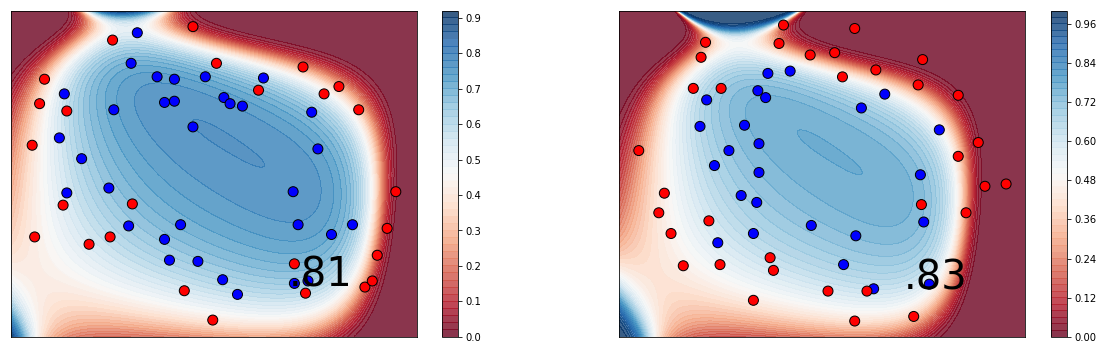

In [63]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train_degree, y_train, model_max_norm.evaluate(X_train_degree, y_train)[1], model_max_norm.predict_proba, degree=degree, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test_degree, y_test, model_max_norm.evaluate(X_test_degree, y_test)[1], model_max_norm.predict_proba, degree=degree, h = 0.01, margin=0.1, ax=ax2)
plt.show()

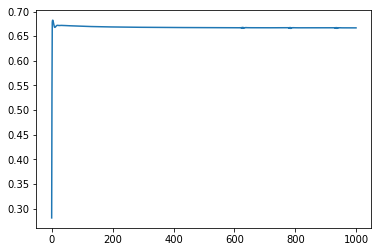

In [64]:
plt.plot(get_weights_array(plot_losses_const.weights))
plt.show()

---
### 4. Regularización

$$ \huge L = ||\hat{y}-y_i||^2 + \lambda g(w)$$

donde:

$\lambda > 0$ y $g(w)$ una funcion que penalizara ciertos valores de $w$

** Nota importante**: Normalmente estos modelos requieren normalización 

Ejemplo video Udacity:
https://youtu.be/aX_m9iyK3Ac
<img src="2points.png" alt="Drawing" style="width:60%;"/>

Las sigmoideas y el problema del gradient descent

<img src="sigmoideas.png" alt="Drawing" style="width:60%;"/>

**Bertrand Russell**: El problema principal con la Inteligencia Artificial es que los modelos malos estan muy seguros de si mismos mientras que los buenos estan llenos de dudas

Intuición: Si mantengo el valor de los pesos bajo -> eventualmente trabajo en la parte lineal, modelo lineal -> Disminuye overfitting

#### 4.1 Ridge regression 
** L2 regularization o Weight decay**

Creencia a priori de que los w's deberias ser chicos (prior belief)
- Restringe los valores altos de $w$ todos por igual ($0.5^2 + 0.5^2 < 1^2+0^2$)
- Se puede demostrar que es un estimador polarizado de los w's, pero posee menor varianza que simplemente minimizar L
- $g(w) = \|w\|^2$ 
- Es muy importante preprocesar: restar media y dividir por desvio por que $\lambda$ es el mismo para todos los $w$'s

**Para regresión lineal (Maximum Likelihood)**  
$Y \sim N(Xw, \sigma^2I)$ Donde los $w$'s son los ground truth - likelihood -  
maximizo log $p(y|X,w)$  
$w_{ML} = (X^TX)^{-1}X^T y$  
$E[w_{ML}] = w$ -> Estimador no polarizado. Los $w_{ml}$ son V.A y hacer least squares es muestrearlas  
$\Sigma[w_{ML}] = \sigma^2 (X^TX)^{-1}$ -> Si esta varianza es grande, no es un buen estimador  

In [65]:
import numpy as np
# Ejemplo, primer columna de 1s para w0, segunda lineal, tercera cuadratica
X = np.matrix([[1, 1, 1], [1, 2, 4], [1, 3, 8], [1, 4, 16], [1, 5, 32], [1, 6, 64]])
# Ejemplo2, alta correlación entre segunda y tercera columna
X2 = np.matrix([[1, 1, 1.1], [1, 2, 2.2], [1, 3, 3.2], [1, 4, 4.3], [1, 5, 5.1], [1, 6, 6.1]])
print(X)
print(X.T)
print(X.T*X)
print((X.T*X)**-1)
print(((X.T*X)**-1).diagonal())
print(((X2.T*X2)**-1).diagonal())

[[ 1  1  1]
 [ 1  2  4]
 [ 1  3  8]
 [ 1  4 16]
 [ 1  5 32]
 [ 1  6 64]]
[[ 1  1  1  1  1  1]
 [ 1  2  3  4  5  6]
 [ 1  4  8 16 32 64]]
[[   6   21  125]
 [  21   91  641]
 [ 125  641 5457]]
[[ 1.67807495 -0.67494224  0.0408427 ]
 [-0.67494224  0.33514117 -0.02390649]
 [ 0.0408427  -0.02390649  0.00205584]]
[[ 1.67807495  0.33514117  0.00205584]]
[[  1.93023256  30.23255814  30.52325581]]


Se puede demostrar que si hay correlación alta entre las columnas de X, la varianza de los w's puede ser muy alta
- Estimador no polarizado
- De alta varianza en muchas circunstancias
- $w_{LS} = w_{ML}$

**Para regresión de Ridge**  (MAP (Maximo a posteriori))  
$Y \sim N(Xw, \sigma^2I)$ ahora los w's tienen una distribución Gaussiana  
$w \sim N(0, \lambda^{-1}\sigma^2 I)$  distribución normal con media cero y varianza de pendiendo de $\lambda$  
$w_{RR} = (\lambda I + X^TX)^{-1}X^T y$  (Se puede demostrar que son menores a los $w_{ml}$)   
$E[w_{RR}] = (\lambda I + X^TX)^{-1}X^T X w$  (w es la "ground truth")  
$\Sigma[w_{RR}] = \sigma^2 Z(X^TX)^{-1}Z^T$  (Es como un Z cuadrado)  
$Z = (I + \lambda (X^TX)^{-1})^-1$

- Estimador polarizado
- Menor varianza
- $w_{RR} = w_{MAP}$

** Como ver esto en la practica: **

$E[(y_0 - x_0^T\hat w)^2|X, x_0] = \sigma^2 + x_0^T(w - E[\hat w])(w - E[\hat w])^Tx_0 + x_0^T \Sigma [\hat w] x_0$

donde:  
- $X$: muestras de training set
- $x_0$: muestra de test set
- $y_0$: salida de teste set
- $\hat w$: $w$'s estimadas con $X$
- $w$: ground truth
- $\sigma ^2$: ruido del modelo
- segundo termino: bias elevado al cuadrado. Es cero para least squares. Distinto de cero para Ridge
- tercer termino: Varianza. Suele ser menor para el caso de Ridge

** de que dependen nuestros resultados **
- de los datos
- del lambda

##### 4.1.1 Polinomial

In [66]:
options = [{'degree': 18, 'lambd': 0.000001}, 
           {'degree': 18, 'lambd': 0.001},
           {'degree': 18, 'lambd': 0.01}, 
           {'degree': 18, 'lambd': 0.1}, 
           {'degree': 18, 'lambd': 0.3}, 
           {'degree': 18, 'lambd': 0.5}, 
           {'degree': 18, 'lambd': 1},
           {'degree': 18, 'lambd': 2},
           {'degree': 18, 'lambd': 5},
           ]
degrees_1, lambdas_1, train_acc_array_1, test_acc_array_1, coefs_array_mean_1, coefs_array_std_1, coefs_abs_max_1, coefs_norm_1, coefs_num_1 = RHelper.test_options(X_train, y_train, X_test, y_test, options, plot_it=False)

Accuracies


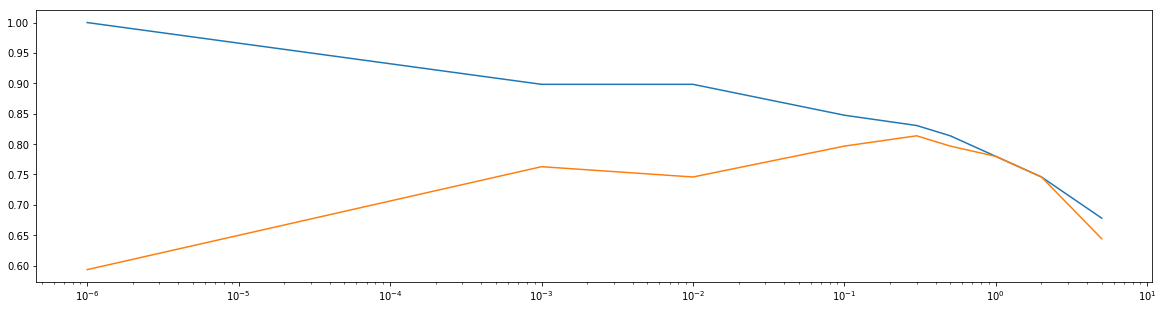

Medias de los pesos


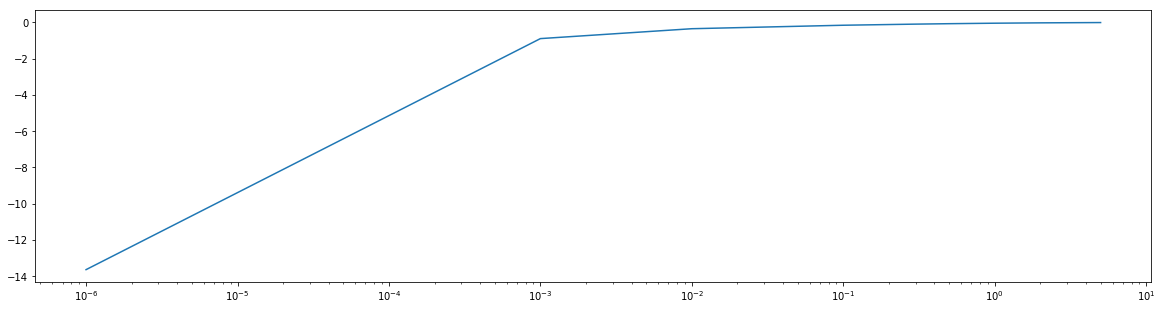

STDs de los pesos


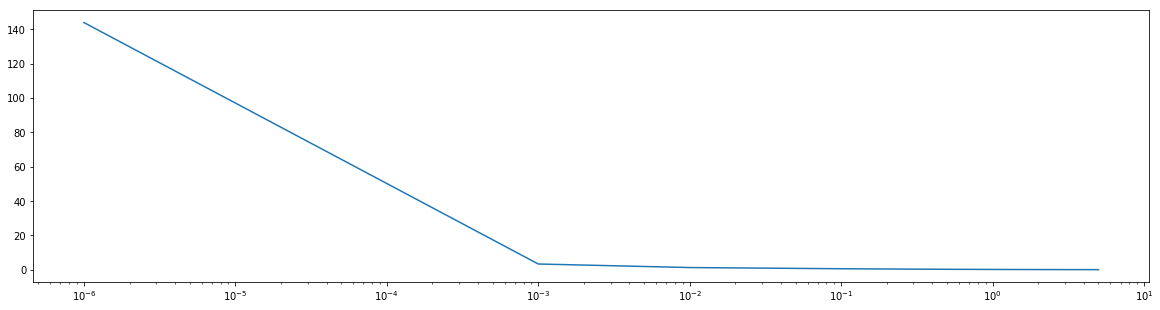

Maximo de los pesos


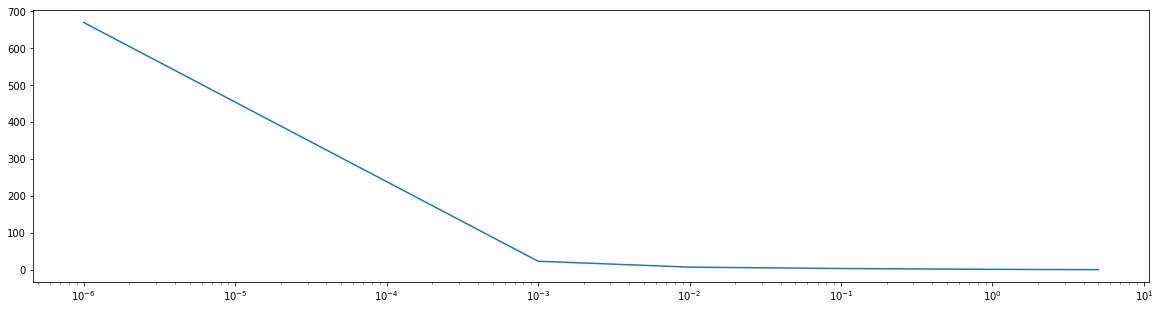

Norma de los pesos


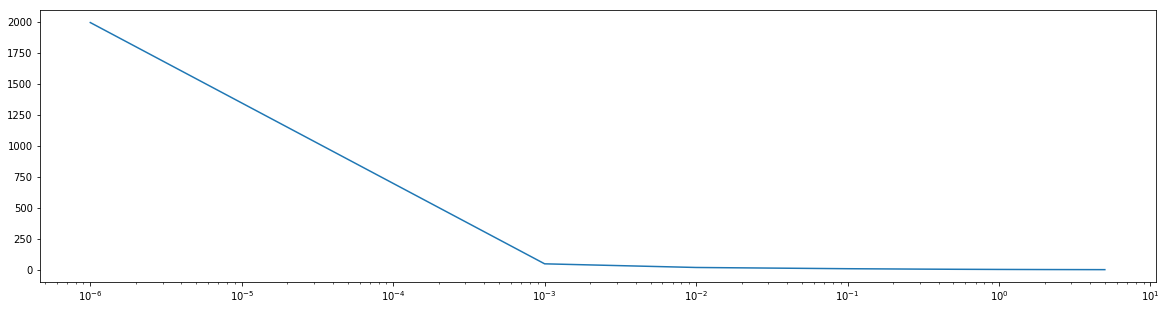

In [67]:
plt.figure(figsize=(20,5))
print("Accuracies")
plt.semilogx(lambdas_1, train_acc_array_1)
plt.semilogx(lambdas_1, test_acc_array_1)
plt.show()
plt.figure(figsize=(20,5))
print("Medias de los pesos")
plt.semilogx(lambdas_1, coefs_array_mean_1)
plt.show()
plt.figure(figsize=(20,5))
print("STDs de los pesos")
plt.semilogx(lambdas_1, coefs_array_std_1)
plt.show()
plt.figure(figsize=(20,5))
print("Maximo de los pesos")
plt.semilogx(lambdas_1, coefs_abs_max_1)
plt.show()
plt.figure(figsize=(20,5))
print("Norma de los pesos")
plt.semilogx(lambdas_1, coefs_norm_1)
plt.show()

##### 4.1.2 Red neuronal con capa oculta

<video controls src="./chips-mlp-20-hidden-reg-l2.mp4" width="480"/>

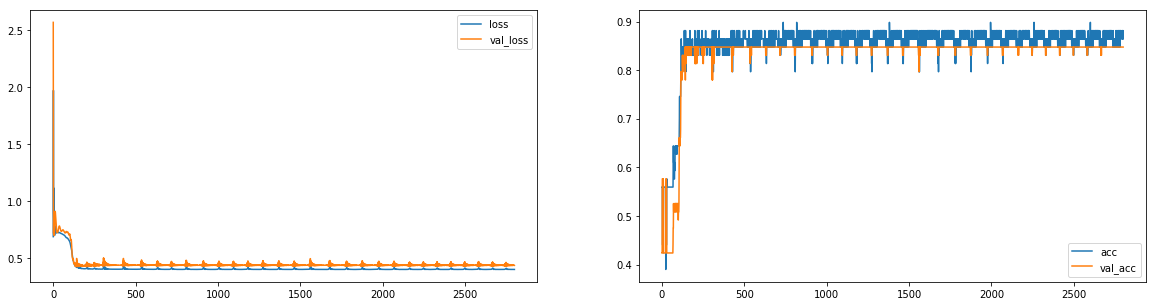

In [91]:
from fnn_helper import PlotLosses
plot_losses_reg = PlotLosses(plot_interval=200, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
two_layer_model_reg = RHelper.get_two_layer_model_L2(input_shape, 
                                                 output_size, 
                                                 hidden_units=hidden_units, 
                                                 lr=0.4, 
                                                 l2_lambda=0.0001, 
                                                 decay=0.0001)
two_layer_model_reg.fit(X_train, 
          y_train, batch_size = 59,
          epochs=3000, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses_reg],
         )

42880/43888 [============================>.] - ETA: 0s(43888, 1)


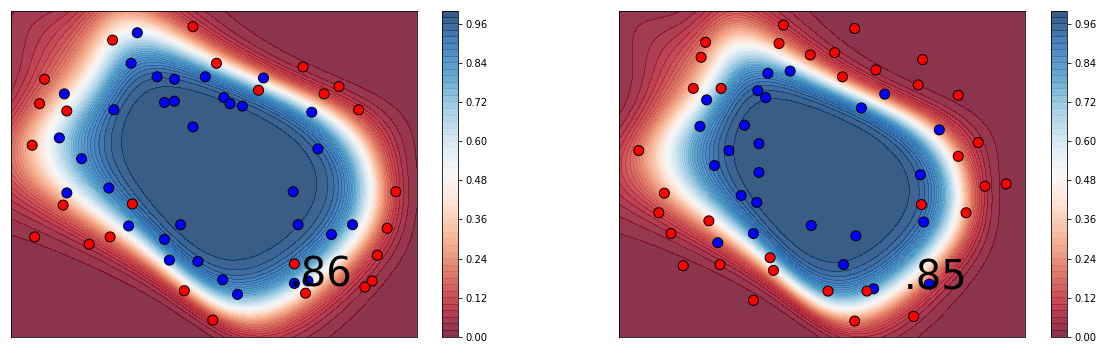

In [92]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train, y_train, two_layer_model_reg.evaluate(X_train, y_train)[1], two_layer_model_reg.predict_proba, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test, y_test, two_layer_model_reg.evaluate(X_test, y_test)[1], two_layer_model_reg.predict_proba, h = 0.01, margin=0.1, ax=ax2)
plt.show()

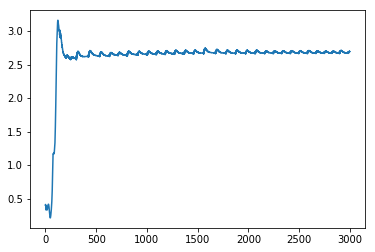

In [93]:
plt.plot(get_weights_array(plot_losses_reg.weights))
plt.show()

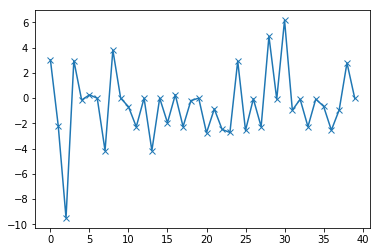

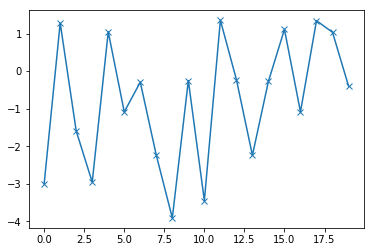

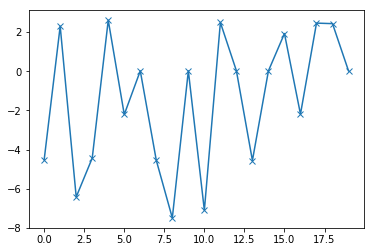

In [94]:
plt.plot(plot_losses_reg.weights[-1][0].reshape(-1,1), marker = 'x')
plt.show()
plt.plot(plot_losses_reg.weights[-1][1].reshape(-1,1), marker = 'x')
plt.show()
plt.plot(plot_losses_reg.weights[-1][2].reshape(-1,1), marker = 'x')
plt.show()

#### 4.2 LASSO 
**(Least Absolute Shrinkage and Selection Operator) -L1 regularization- ** . 
- Selector de parametros (Feature selection) - Puede tratar los pesos en forma independiente. Cuando un peso es cero, No importa la relación con el resto como en L2. Sí depende de la función de costo
- $g(w) = \|w\|$ 
- Sparse solution

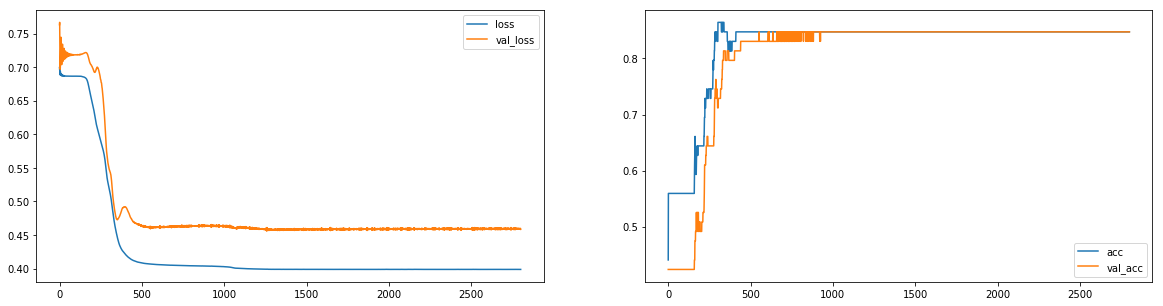

In [96]:
from fnn_helper import PlotLosses
plot_losses_reg_l1 = PlotLosses(plot_interval=200, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
two_layer_model_reg_l1 = RHelper.get_two_layer_model_L2(input_shape, 
                                                 output_size, 
                                                 hidden_units=hidden_units, 
                                                 lr=0.05, 
                                                 l1_lambda=0.0006, 
                                                 decay=0.0001)
two_layer_model_reg_l1.fit(X_train, 
          y_train, batch_size = 59,
          epochs=3000, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses_reg_l1],
         )

43552/43888 [============================>.] - ETA: 0s(43888, 1)


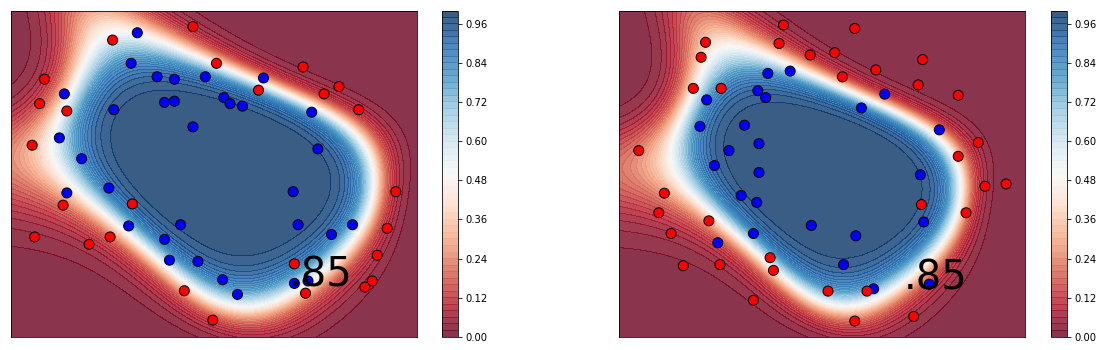

In [97]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train, y_train, two_layer_model_reg_l1.evaluate(X_train, y_train)[1], two_layer_model_reg_l1.predict_proba, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test, y_test, two_layer_model_reg_l1.evaluate(X_test, y_test)[1], two_layer_model_reg_l1.predict_proba, h = 0.01, margin=0.1, ax=ax2)
plt.show()

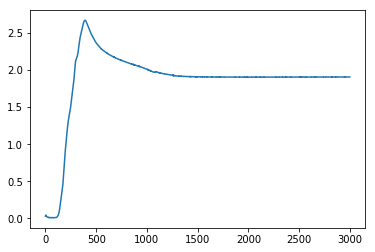

In [98]:
weights_l1 = get_weights_array(plot_losses_reg_l1.weights)
plt.plot(weights_l1)
plt.show()

**Observar "sparcity"**

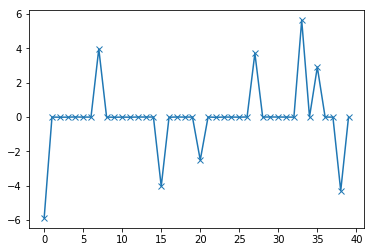

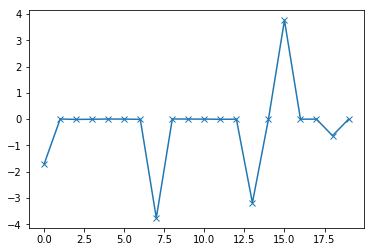

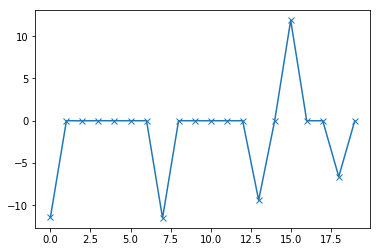

In [99]:
plt.plot(plot_losses_reg_l1.weights[-1][0].reshape(-1,1), marker = 'x')
plt.show()
plt.plot(plot_losses_reg_l1.weights[-1][1].reshape(-1,1), marker = 'x')
plt.show()
plt.plot(plot_losses_reg_l1.weights[-1][2].reshape(-1,1), marker = 'x')
plt.show()

#### 4.3 ElasticNet
-  Combinacion de L1 y L2

#### 4.4 Sparcity y LO regularization:

$w_{RR} = arg \min\| \hat{y}-y_i \|^2 + \lambda \|w\|^d$

- L0 cuenta la cantidad de $w$'s distinto de cero (d=0)
- Si d esta entre 0 y 1 aumenta la esparcibidad (sparsity) pero la funcion de costo no es convexa

keras activity_regularizer: https://github.com/keras-team/keras/issues/1618

---
### 5. Dropout

- Elimina conexiones aleatoriamente al momento de entrenamiento (Especificamente, multiplica por cero algunas de las activaciones a la salida de una capa o eventualemente a la entrada de la red, aunque esto no es tan usual)
- keep_prob es la probabilidad de que las conexiones no se eliminen
- En keras se define el dropout_rate que es (1 - keep_prob)
- Al momento de entrenamiento, cuando se eliminan las conexiones, se dividen las salidas de las activaciones por 1/keep_prob para mantener en promedio lo que llega a la capa siguiente 
- En momento de evaluación no se eliminan conexiones.

<img src="./dropout.png" alt="Drawing" style="width:60%;"/>

In [100]:
from keras.layers.core import Dense, Activation, Dropout

In [132]:
dropout_rate = 0.25
max_norm_cons = 10.0
model_do = Sequential()
# model.add(Dropout(dropout_rate, input_shape=(input_shape,))) # Dropout a la entrada de la red
model_do.add(Dense(hidden_units,input_dim=input_shape, kernel_constraint=max_norm(max_norm_cons)))
model_do.add(Activation('sigmoid'))
model_do.add(Dropout(dropout_rate))
model_do.add(Dense(output_size))
model_do.add(Activation('sigmoid'))
model_do.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 20)                60        
_________________________________________________________________
activation_5 (Activation)    (None, 20)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 21        
_________________________________________________________________
activation_6 (Activation)    (None, 1)                 0         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [102]:
lr = 0.4 
decay = 0.005 
batch_size = 59 
epochs = 4000
selectedOptimizer = optimizers.adam(lr=lr, decay=decay)
model_do.compile(loss = 'binary_crossentropy', optimizer=selectedOptimizer, metrics=['accuracy'])

In [103]:
plot_losses_do = PlotLosses(plot_interval=100, 
                         evaluate_interval=None, 
                         x_val=X_test, 
                         y_val_categorical=y_test)

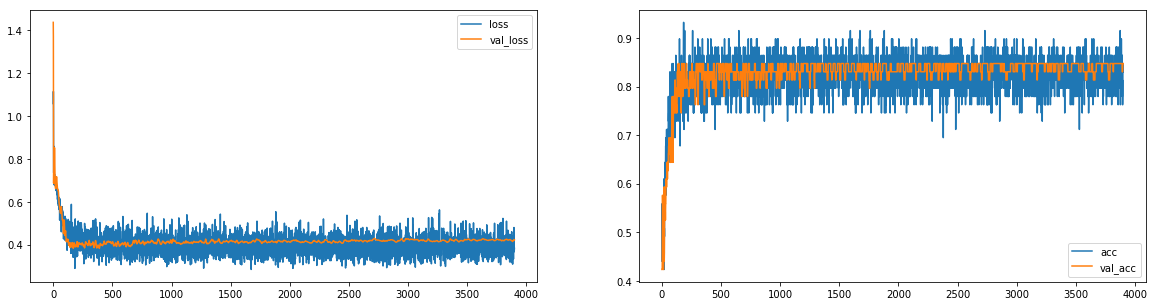

In [104]:
model_do.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses_do],
         )

<video controls src="./chips-mlp-20-hidden-dropout-max-norm.mp4" width="480"/>

43840/43888 [============================>.] - ETA: 0s(43888, 1)


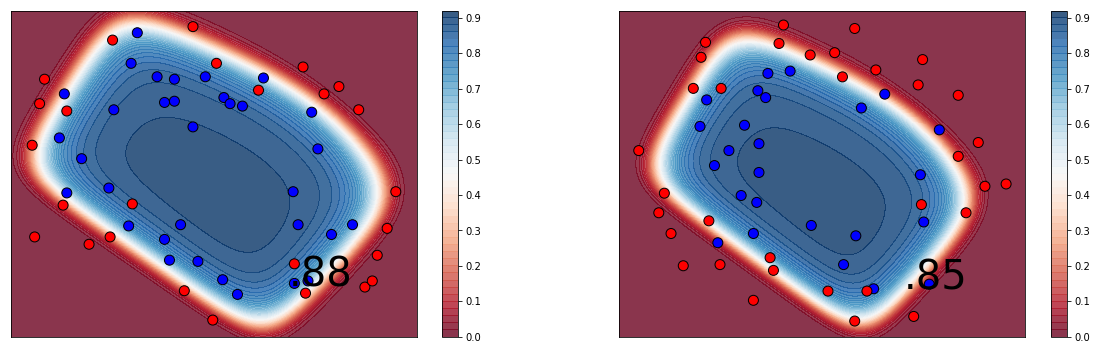

In [105]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train, y_train, model_do.evaluate(X_train, y_train)[1], model_do.predict_proba, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test, y_test, model_do.evaluate(X_test, y_test)[1], model_do.predict_proba, h = 0.01, margin=0.1, ax=ax2)
plt.show()

**Tips:**  
- Usar un valor bajo entre 20% y 50%
- Usar una "red grande", muchos parámetros
- Usarlo tanto en la capa visible (entrada) como en las capas ocultas. La aplicación de dropout en cada capa a mostrado buenos resultados
- Usar un learning rate grande con decay y momentum. Incrementar el learning rate por un factor de 10 o hasta 100 y usar momentum del entre 0.9 y 0.99.
- Usar max-norm. Valores en el orden de 4 o 5 han mostrado buenos resultados

Referencias: [[1]](https://www.coursera.org/learn/deep-neural-network/lecture/eM33A/dropout-regularization), [[2]](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/)

---
### 6. Batch Normalization 
Paper: https://arxiv.org/pdf/1502.03167.pdf  
Soluciona el problema de la "Covariate Shift" y nos da de regalo regularización

![batch_norm.webp](batch_norm.webp)

Referencias: [[1]](https://arxiv.org/abs/1502.03167)
[[2]](https://gab41.lab41.org/batch-normalization-what-the-hey-d480039a9e3b)

In [106]:
from keras.layers import BatchNormalization

model_bn = Sequential()
model_bn.add(Dense(hidden_units,input_dim=input_shape))
model_bn.add(BatchNormalization())
model_bn.add(Activation('sigmoid'))
model_bn.add(Dense(output_size))
model_bn.add(BatchNormalization())
model_bn.add(Activation('sigmoid'))
model_bn.summary()
lr = 0.001 
decay = 0.001 
batch_size = 59 
epochs = 4000
selectedOptimizer = optimizers.adam(lr=lr, decay=decay)
model_bn.compile(loss = 'binary_crossentropy', optimizer=selectedOptimizer, metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 20)                60        
_________________________________________________________________
batch_normalization_1 (Batch (None, 20)                80        
_________________________________________________________________
activation_3 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 21        
_________________________________________________________________
batch_normalization_2 (Batch (None, 1)                 4         
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 165
Trainable params: 123
Non-trainable params: 42
_________________________________________________________________


- Cuales son los non-trainable parameters?
- Donde va la capa de batch normalization?

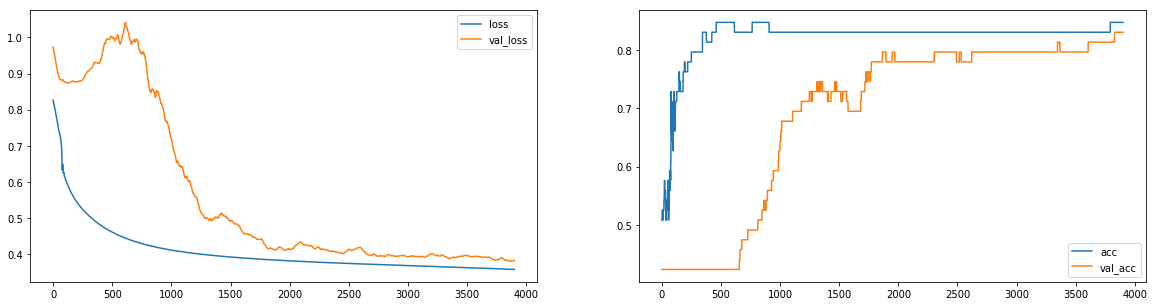

In [107]:
plot_losses_bn = PlotLosses(plot_interval=100, 
                         evaluate_interval=None, 
                         x_val=X_test, 
                         y_val_categorical=y_test)
model_bn.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses_bn],
         )

43552/43888 [============================>.] - ETA: 0s(43888, 1)


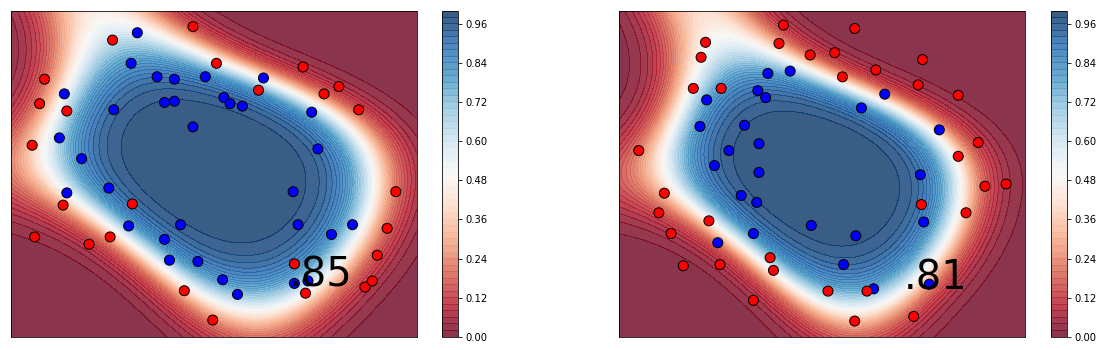

In [108]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train, y_train, model_bn.evaluate(X_train, y_train)[1], model_bn.predict_proba, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test, y_test, model_bn.evaluate(X_test, y_test)[1], model_bn.predict_proba, h = 0.01, margin=0.1, ax=ax2)
plt.show()

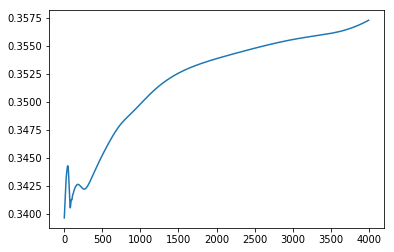

In [109]:
weights_l1 = get_weights_array(plot_losses_bn.weights)
plt.plot(weights_l1)
plt.show()

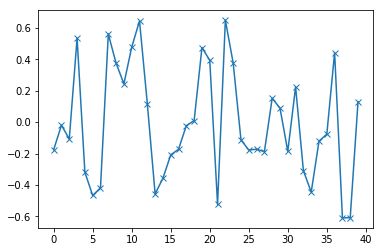

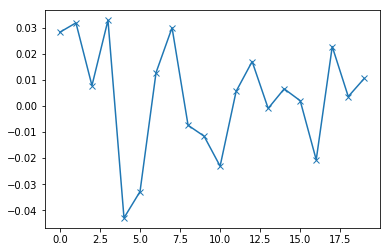

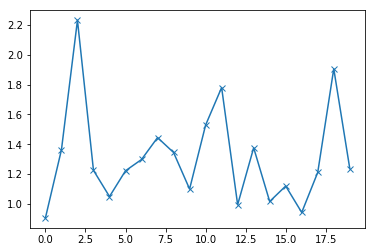

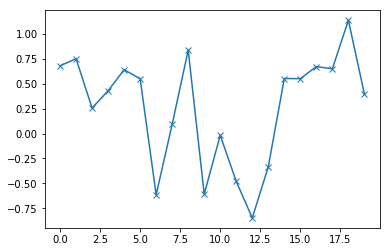

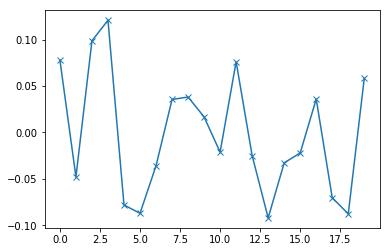

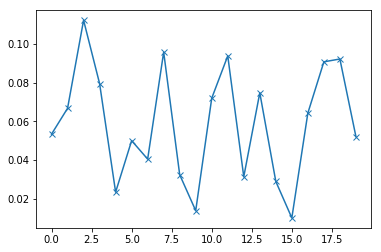

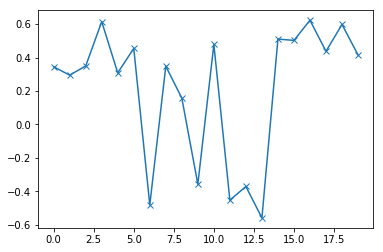

In [110]:
plt.plot(plot_losses_bn.weights[-1][0].reshape(-1,1), marker = 'x')
plt.show()
plt.plot(plot_losses_bn.weights[-1][1].reshape(-1,1), marker = 'x')
plt.show()
plt.plot(plot_losses_bn.weights[-1][2].reshape(-1,1), marker = 'x')
plt.show()
plt.plot(plot_losses_bn.weights[-1][3].reshape(-1,1), marker = 'x')
plt.show()
plt.plot(plot_losses_bn.weights[-1][4].reshape(-1,1), marker = 'x')
plt.show()
plt.plot(plot_losses_bn.weights[-1][5].reshape(-1,1), marker = 'x')
plt.show()
plt.plot(plot_losses_bn.weights[-1][6].reshape(-1,1), marker = 'x')
plt.show()

[Discución interesante](https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras)

---
### 7. Inicialización de pesos

- Los bias se suelen inicializar en cero
- Los 'w's suelen inicializarse de manera aleatoria para romper la simetria entre las unidades ocultas de la misma capa.
- La idea general es arrancar en una zona de la función de activación cuya derivada sea significativa.
- Los pesos de la salida no son problema.
- Se han propuesto varios puntos de partida en diferentes publicaciones

Ejemplos para la tangente hiperbolica:  
Distribución uniforme entre [-r, r],   
donde r es
$ r = \sqrt{\frac{6}{(fan_{in} + fan_{out})}} $

Para sigmoidea:

$ r = 4\sqrt{\frac{6}{(fan_{in} + fan_{out})}} $

También es importonte para redes muy profundas analizar el problema del vanishing y exploting gradient. Se proponen en muchos casos distribuciones gaussianas con:

$\mu = 0$  y $\sigma^2=\frac{1}{fan_{in}}$

** Recordar que todo esto son puntos de partida y puede ser necesario modificarlos **

Referencias: [[1]](https://arxiv.org/pdf/1206.5533.pdf), [[2]](https://www.coursera.org/learn/deep-neural-network/lecture/RwqYe/weight-initialization-for-deep-networks)

---
### 8. Tamaño del dataset:
#### 8.1 Data augmentation
#### 8.2 AIC 
**(Akaike information criterion) [wikipedia](https://en.wikipedia.org/wiki/Akaike_information_criterion)**  
$AIC = 2k -2ln(\hat{L})$ Cantidad de muestras mucho mayor que $k^2$

$AICc = AIC + \frac{2k(k+1)}{n-k-1}$ (with correction)

k es la cantidad de parametros, $\hat{L}$ es el likelihood y n es el tamaño del dataset

#### 8.3 BIC 
**(Bayesian information criterion): [wikipeedia](https://en.wikipedia.org/wiki/Bayesian_information_criterion)**  
$BIC = ln(n)k - 2ln(\hat{L})$
#### 8.4 DIC 
** (Deviance information criterion): [wikipedia](https://en.wikipedia.org/wiki/Deviance_information_criterion) [pdf](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.58.6208&rep=rep1&type=pdf) **  
DIC = $log(P(X(i)) - \frac{1}{(M-1)\sum{log(P(X(all-but-i)}}$

## Recomendaciones para tratar el data-set

### Train, Cross validation, test
¿Por que CV-set?
- Para datasets medianos: (60% ,20% ,20%)
- Para datasets grandes (Big data, 1Millon):  (98%, 2%, 2%)

### k-fold